In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 points between 0 and 10
n_points = 1000
X = np.linspace(0, 10, n_points)

# True quadratic relationship: y = 2 + 3X - 0.5X²
true_y = 2 + 3*X - 0.5*X**2

# Add Gaussian noise
noise = np.random.normal(0, 1.5, n_points)
y = true_y + noise

# Create DataFrame
df = pd.DataFrame({'X': X, 'y': y, 'true_y': true_y})
df

,X,y,true_y
0,0.00000,2.745071,2.000000
1,0.01001,1.822583,2.029980
2,0.02002,3.031392,2.059860
3,0.03003,4.374184,2.089639
4,0.04004,1.768088,2.119319
...,...,...,...
995,9.95996,-18.142172,-17.720521
996,9.96997,-15.093711,-17.790241
997,9.97998,-16.898796,-17.860060
998,9.98999,-18.786749,-17.929980


<Axes: xlabel='X', ylabel='y'>

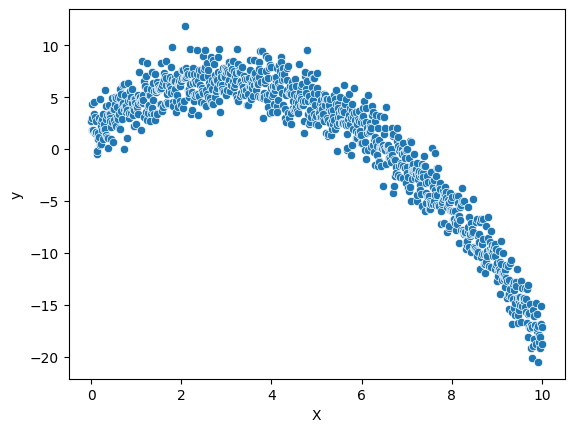

In [3]:
sns.scatterplot(x="X",y="y",data=df)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[["X"]],df[["y"]],test_size=0.25,random_state=42)
X_train

,X
82,0.820821
991,9.919920
789,7.897898
894,8.948949
398,3.983984
...,...
106,1.061061
270,2.702703
860,8.608609
435,4.354354


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
X_test.size

250

In [6]:
from sklearn.linear_model  import LinearRegression
regression=LinearRegression()
model=regression.fit(x_train,Y_train)
y_pred=model.predict(x_test)
y_pred

array([[ 1.22950095e-03],
       [-4.23611984e+00],
       [-4.29497191e+00],
       [-2.72558327e+00],
       [ 2.15913889e+00],
       [-3.07869571e+00],
       [-2.05859309e+00],
       [ 1.58168365e-01],
       [-6.62943752e+00],
       [ 7.55391235e+00],
       [-5.68780434e+00],
       [ 8.73095384e+00],
       [-2.25476668e+00],
       [-8.86581634e+00],
       [-8.17920881e+00],
       [-7.41413184e+00],
       [ 4.72901279e+00],
       [-7.10025412e+00],
       [-4.70693643e+00],
       [ 3.96393583e+00],
       [-5.48056525e-01],
       [ 6.80845275e+00],
       [ 2.94383321e+00],
       [-1.16474647e-01],
       [ 6.10222786e+00],
       [ 5.61179390e+00],
       [ 8.24051988e+00],
       [-9.12084199e+00],
       [-7.47298392e+00],
       [-8.35576503e+00],
       [ 3.43426716e+00],
       [ 7.49506028e+00],
       [-1.96050630e+00],
       [ 4.32811378e-01],
       [ 2.96345057e+00],
       [ 6.33763615e+00],
       [-3.25525194e+00],
       [-1.23466406e+00],
       [-7.4

In [7]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score,
    explained_variance_score, max_error
)
import numpy as np

# Example: replace with your real values
# If y_test is a DataFrame with column "Height"
y_true = Y_test["y"]
y_pred = y_pred  # your predicted NumPy array

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
evs = explained_variance_score(y_true, y_pred)
max_err = max_error(y_true, y_pred)

# Print all
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Max Error: {max_err:.2f}")


Mean Absolute Error (MAE): 3.41
Mean Squared Error (MSE): 16.74
Root Mean Squared Error (RMSE): 4.09
Mean Absolute Percentage Error (MAPE): 139.25%
R-squared (R²): 0.68
Explained Variance Score: 0.68
Max Error: 11.17


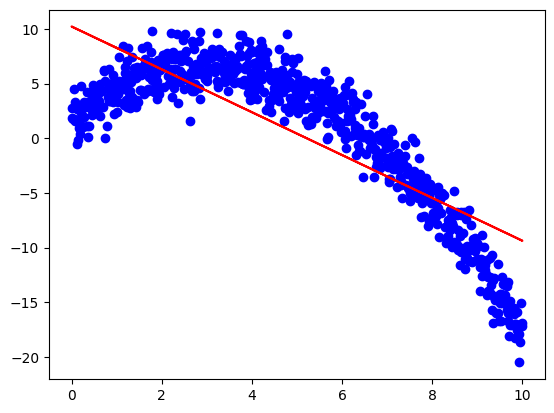

In [8]:
##
plt.plot(X_train,model.predict(x_train),color="r")
plt.scatter(X_train,Y_train,color="b")

In [16]:
####lets apply polynomial regression 
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_X = PolynomialFeatures(degree=2)
X_train_poly = poly_X.fit_transform(X_train)
X_test_poly = poly_X.transform(X_test)
X_test.shape
X_test_poly.shape
X_test_poly

array([[1.00000000e+00, 5.21521522e+00, 2.71984697e+01],
       [1.00000000e+00, 7.37737738e+00, 5.44256970e+01],
       [1.00000000e+00, 7.40740741e+00, 5.48696845e+01],
       [1.00000000e+00, 6.60660661e+00, 4.36472509e+01],
       [1.00000000e+00, 4.11411411e+00, 1.69259349e+01],
       [1.00000000e+00, 6.78678679e+00, 4.60604749e+01],
       [1.00000000e+00, 6.26626627e+00, 3.92660929e+01],
       [1.00000000e+00, 5.13513514e+00, 2.63696129e+01],
       [1.00000000e+00, 8.59859860e+00, 7.39358979e+01],
       [1.00000000e+00, 1.36136136e+00, 1.85330476e+00],
       [1.00000000e+00, 8.11811812e+00, 6.59038418e+01],
       [1.00000000e+00, 7.60760761e-01, 5.78756935e-01],
       [1.00000000e+00, 6.36636637e+00, 4.05306207e+01],
       [1.00000000e+00, 9.73973974e+00, 9.48625302e+01],
       [1.00000000e+00, 9.38938939e+00, 8.81606331e+01],
       [1.00000000e+00, 8.99899900e+00, 8.09819830e+01],
       [1.00000000e+00, 2.80280280e+00, 7.85570355e+00],
       [1.00000000e+00, 8.83883

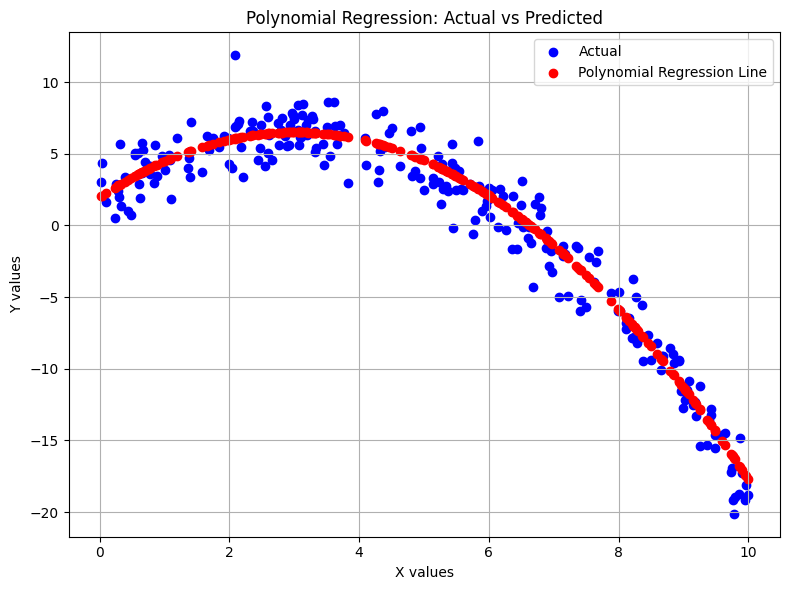

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predict on the transformed test data
y_pred = model.predict(X_test_poly)

# Now this works:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Polynomial Regression Line')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [22]:
y_true = Y_test["y"]
y_pred = y_pred  # your predicted NumPy array

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
evs = explained_variance_score(y_true, y_pred)
max_err = max_error(y_true, y_pred)

# Print all
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Max Error: {max_err:.2f}")


Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 2.21
Root Mean Squared Error (RMSE): 1.49
Mean Absolute Percentage Error (MAPE): 57.06%
R-squared (R²): 0.96
Explained Variance Score: 0.96
Max Error: 5.80
